In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)


60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

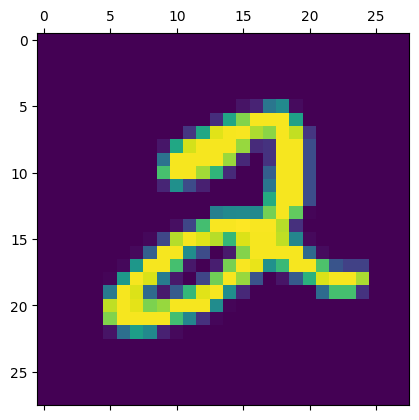

In [7]:
plt.matshow(X_train[5])

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train/255
X_test=X_test/255

In [11]:
#doing flattend
#convert into single array
X_train_flattend = X_train.reshape(len(X_train),28*28)
X_test_flattend = X_test.reshape(len(X_test),28*28)

In [12]:
# X_train_flattend[0]

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattend,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4682 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2668 - accuracy: 0.9252


In [14]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.9272


[0.2645835280418396, 0.9272000193595886]

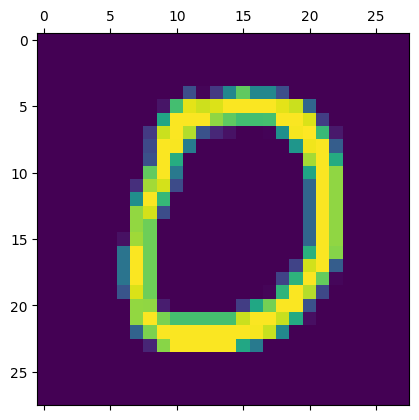

In [15]:
plt.matshow(X_test[10])

In [16]:
y_predicted = model.predict(X_test_flattend)
y_predicted[10]

313/313 [==============================] - 1s 3ms/step


array([9.9788654e-01, 1.5441613e-07, 5.3847504e-01, 6.4150095e-02,
       1.5868494e-04, 8.4503478e-01, 2.9730747e-02, 1.7623672e-05,
       6.0029060e-01, 2.9822678e-04], dtype=float32)

In [17]:
np.argmax(y_predicted[10])

0

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2772 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1266 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0874 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0511 - accuracy: 0.9851


In [19]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit